In [1]:
!pip3 install -r requirements.txt
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 12.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Dataset

In [2]:
#Datos bd
import pandas as pd

df_msg = pd.read_csv('Message.csv')
df_cat = pd.read_csv('Category.csv')
df_user = pd.read_csv('User.csv') 

df_userMes = pd.read_csv('UserMessage.csv') 
df_mesCat = pd.read_csv('MessageCategory.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## EDA
In this section we are going to use only data_pp column.

In [3]:
df_msg= df_msg.dropna(subset=['data_pp'])

In [4]:
final = pd.merge(df_msg, df_mesCat, on='id_message')
final = pd.merge(final, df_cat, on='id_category')
final = pd.merge(final, df_userMes, on='id_message')

In [5]:
df = final.copy()

In [6]:
#df = df.drop(columns=['id_message', 'dataset','timestamp','data','id_forwarded','emojis','id_reply'])
df = df.drop(columns=['dataset','timestamp','data','id_forwarded','emojis','id_reply'])

Users activity
- There is a small group of people that contribute with more than 500 messages

In [7]:
df2= pd.DataFrame(df.groupby('id_user', as_index=False).size().sort_values(by='size', ascending=False,ignore_index=True))
df2.shape[0]

25876

In [8]:
#More than 500 msgs per person
df2[df2['size'] >500]

,id_user,size
0,8064210797453834777,2244
1,8064210797453834894,1515
2,8064210797453835891,1469
3,8064210797453834779,1464
4,8064210797453836393,1437
5,8064210797453861404,1311
6,8064210797453841657,1302
7,8064210797453841676,1031
8,8064210797453836414,1010
9,8064210797453848478,1002


In [9]:
df[df.id_user==df2.id_user[0]].shape

(2244, 13)

# Extract topics and frequent words from the most popular group

In [10]:
name = df['name'].value_counts().idxmax()

In [11]:
import matplotlib.pyplot as plt

print(f' The most popular group: {name}')

 The most popular group: Conchalí con Boric🌳


In [12]:
pd.DataFrame(df['name'].value_counts())

,name
Conchalí con Boric🌳,9288
7 Kast Presidente🇨🇱,9249
Comando Boric San Carlos,7932
Mujeres x Kast,7781
PROVINCIA CAUQ X BORIC ✊🏻,6432
...,...
MUJERES SANTIAGO X BORIC,1
Techo para todos x Boric🌳,1
Fútbol x Boric,1
#JAKMaculAPODERADOS19dic,1


In [13]:
import data_cleaning.spanish as sp
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_doc_train,entities = sp.corpus(dataset=df[df['name'] == name].data_pp.tolist()[0:5000])
X_train_preprocessed = [" ".join(words_list) for words_list in cleaned_doc_train]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2022-02-28 07:42:10 INFO: Downloading default packages for language: es (Spanish)...
2022-02-28 07:42:12 INFO: File exists: /root/stanza_resources/es/default.zip.
2022-02-28 07:42:27 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 5000/5000 [40:40<00:00,  2.05it/s]


In [14]:
import gensim.corpora as corpora
#Dictonary-> TF-IDF / Bag of words

id2word = corpora.Dictionary(cleaned_doc_train)
corpus = [id2word.doc2bow(text) for text in cleaned_doc_train]

print(corpus[:1][0][:30])

[(0, 1)]


In [19]:
for i in range(len(corpus[2])):
  print("Word {} (\"{}\") appears {} time.".format(corpus[2][i][0], id2word[corpus[2][i][0]], corpus[2][i][1]))

Word 2 ("jajajar") appears 1 time.


## Words frecuency (using wordcloud library)

In [20]:
import itertools

#all the words of the corpus are in a list
corpus_words = list(itertools.chain.from_iterable(cleaned_doc_train))

dis,disponible,jajajar,fb,harto,campana,hola,sip,facebook,red,uso,comuna,instagram,pyme,tik,tok,joven,clave,tiktok,lentejo,nop,tiro,ultimo,pon,privado,link,twitter,tendencia,twitazo,campán,buen,tarde,todser,bienvenir,gente,comando,jornada,reunion,lineamiento,campán,comando,territorial,obstante,anterior,necesario,reunion,amplio,persona,independiente,organizacion,partido,comando,territorial,idea,més,territorial,evaluacion,propuesto,mesa,territorial,programa,urgente,semana,dondle,hora,dia,reunion,disponibilidad,convocatorio,difusion,masivo,elemento,diagnostico,informacion,comando,mayor,cantidad,gente,común,fuerte,abrazo,tod,aldo,flores,voto,solo,estupidez,facebook,nosotr,medida,gente,mensaje,wn,jdkdkdldkf,gracia,buen,seguir,buen,tarde,todser,bienvenir,gente,comando,jornada,reunion,lineamiento,campán,comando,territorial,obstante,anterior,necesario,reunion,amplio,persona,independiente,organizacion,partido,comando,territorial,idea,més,territorial,evaluacion,propuesto,mesa,territorial,program

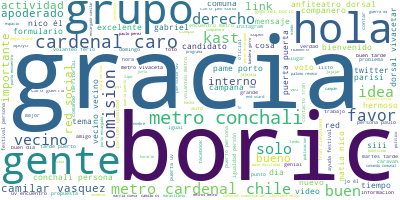

In [21]:
from wordcloud import WordCloud

#Visualizar palabras más frecuentes
long_string = ','.join(corpus_words)
print(long_string)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)
print(wordcloud.words_)
wordcloud.to_image()

## LDA model using topic_m script

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


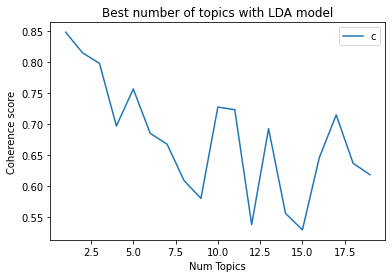

In [23]:
import topic_m as tm
import warnings

warnings.filterwarnings("ignore")

model_list, coherence_values = tm.compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LDA')


In [31]:
lda_model = model_list[1]

In [34]:
print('Best Coherence Score: ', coherence_values[1])
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

Best Coherence Score:  0.8155027392125413

Perplexity:  -7.71715720135126


In [35]:
from pprint import pprint 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"persona" + 0.012*"actividad" + 0.011*"metro" + 0.010*"caro" + '
  '0.008*"puerta" + 0.007*"uv" + 0.007*"encuentro" + 0.007*"tarde" + '
  '0.007*"festival" + 0.007*"volanteo"'),
 (1,
  '0.023*"persona" + 0.023*"metro" + 0.015*"caro" + 0.014*"conchali" + '
  '0.014*"encuentro" + 0.012*"uv" + 0.012*"puerta" + 0.011*"18" + '
  '0.011*"actividad" + 0.011*"paulo"')]


In [36]:
for i, row in enumerate(doc_lda[0:10]):
  row = sorted(row, key=lambda x: (x[1]), reverse=True)
 # pprint(row[0])
  for j, (topic_num,prop_topic) in enumerate(row):
    if j == 0:  
      wp = lda_model.show_topic(topic_num)
      topic_keywords = ", ".join([word for word, prop in wp])
      print(f'The phrase: {X_train_preprocessed[i]}.\nBelongs to the topic # {str(int(topic_num))} with {round(prop_topic,4)} score\n')
    else:
      break

The phrase: dis.
Belongs to the topic # 0 with 0.5472999811172485 score

The phrase: disponible.
Belongs to the topic # 1 with 0.7027000188827515 score

The phrase: jajajar.
Belongs to the topic # 0 with 0.7178999781608582 score

The phrase: fb harto campana.
Belongs to the topic # 0 with 0.8205999732017517 score

The phrase: hola.
Belongs to the topic # 0 with 0.6897000074386597 score

The phrase: sip.
Belongs to the topic # 0 with 0.7134000062942505 score

The phrase: facebook red uso comuna instagram pyme tik tok joven.
Belongs to the topic # 1 with 0.7659000158309937 score

The phrase: clave tiktok lentejo.
Belongs to the topic # 0 with 0.8241999745368958 score

The phrase: nop tiro.
Belongs to the topic # 1 with 0.5353000164031982 score

The phrase: ultimo pon privado.
Belongs to the topic # 0 with 0.8234000205993652 score



## Bar chart word count and weights of Topic Keywords

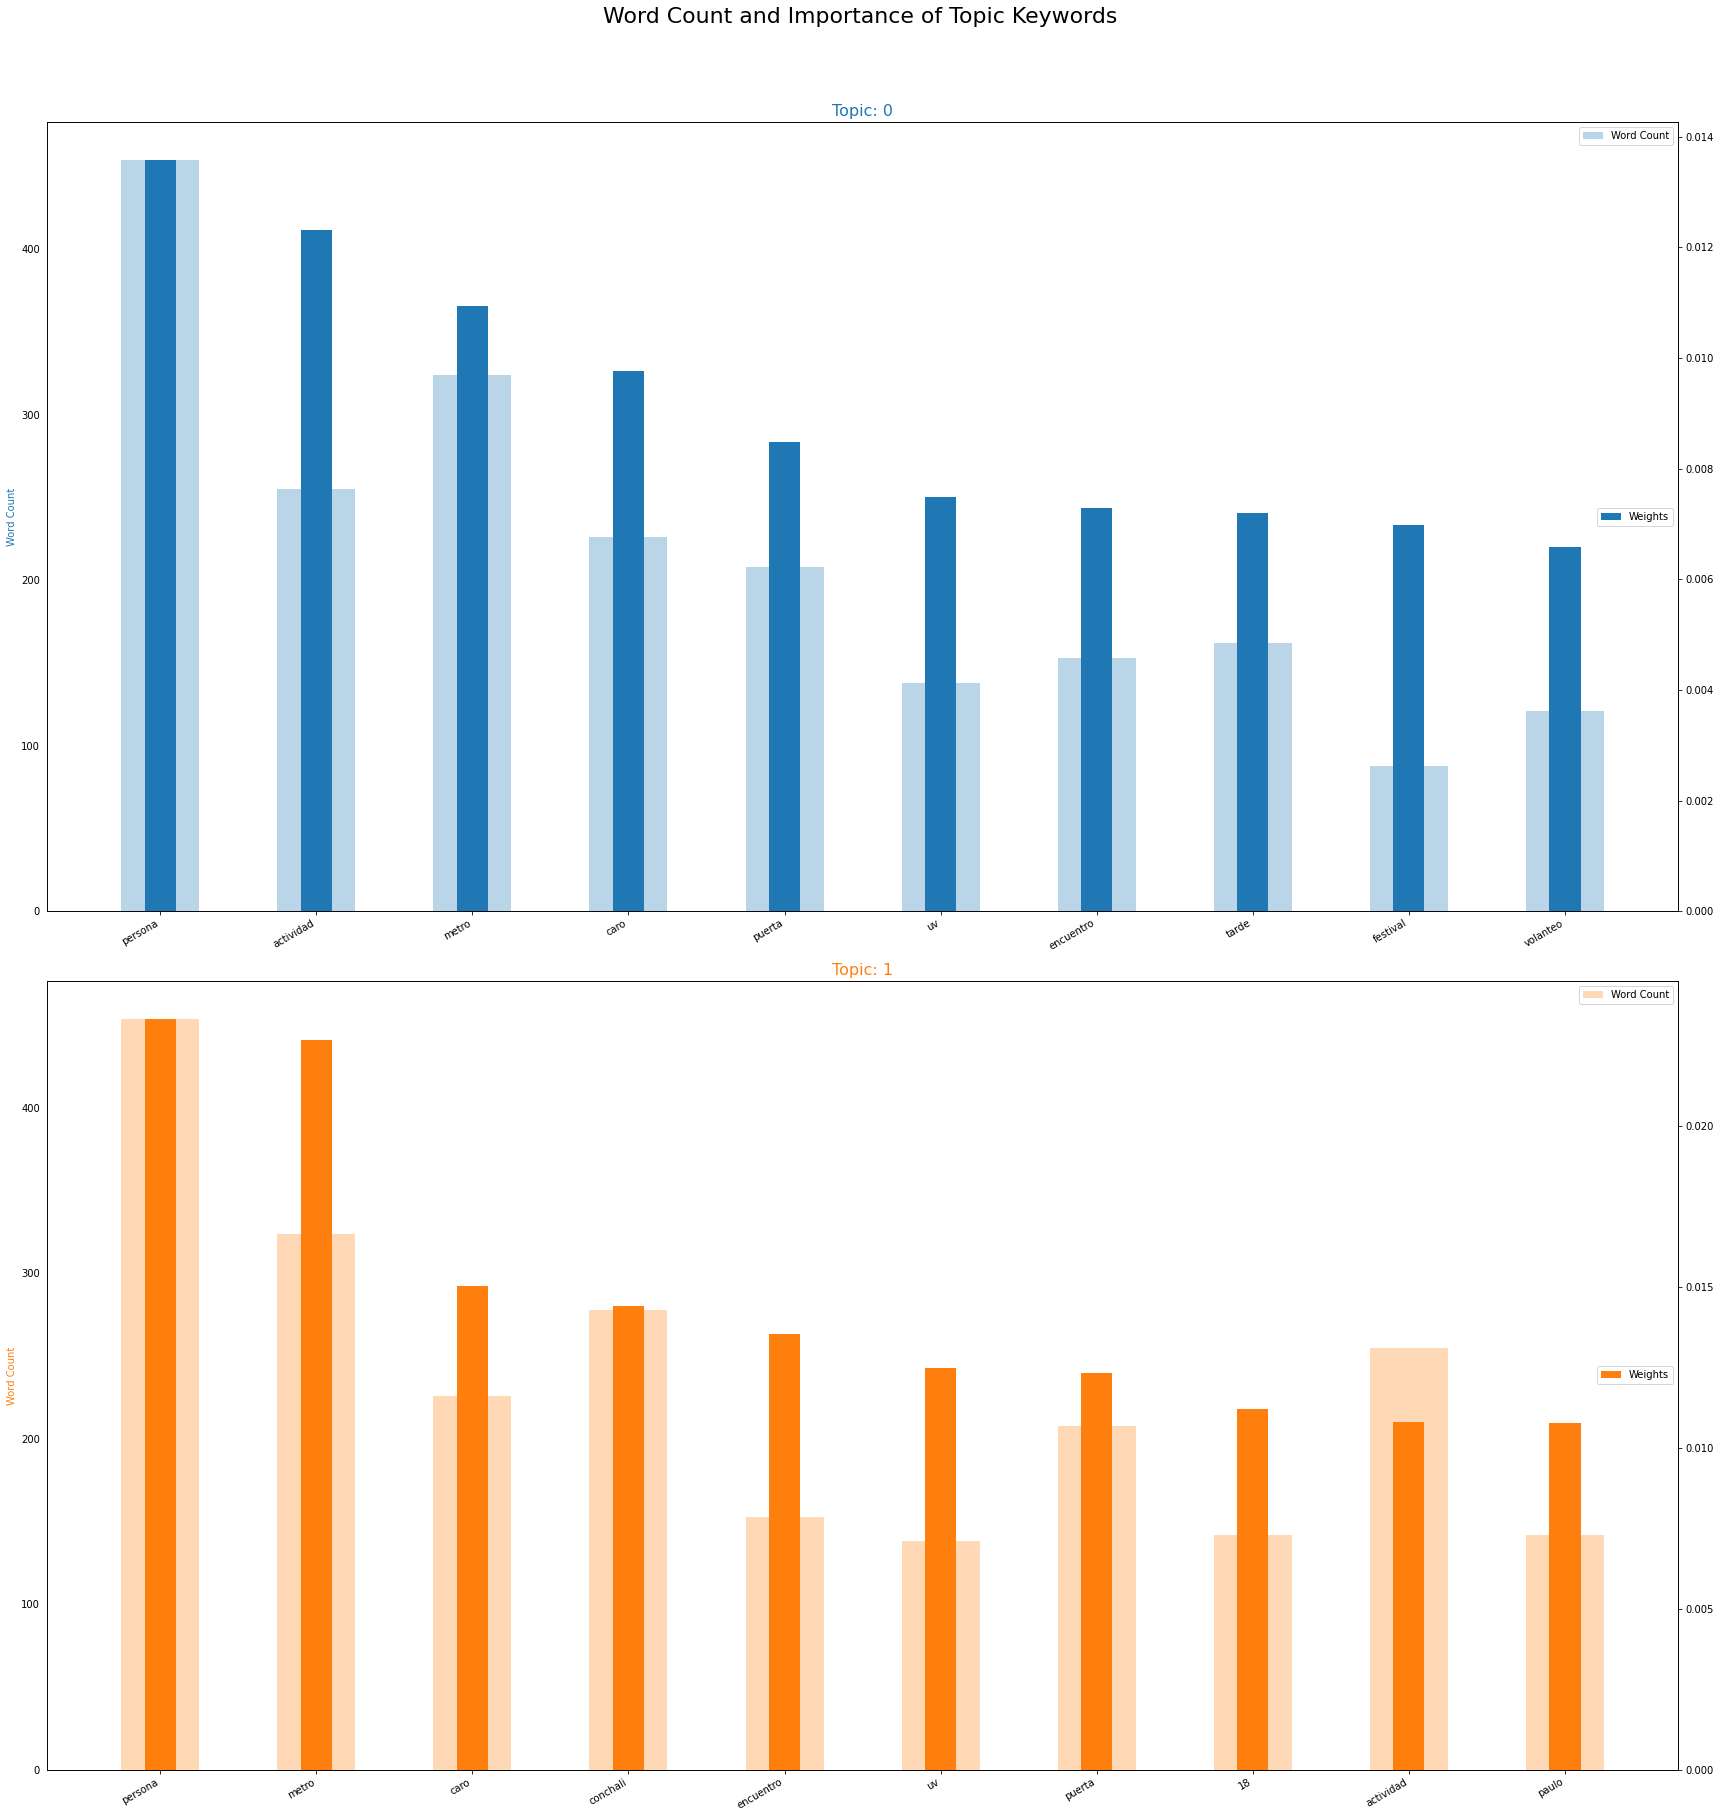

In [37]:
df = tm.word_count_weight_keywords(lda_model, cleaned_doc_train, (24,24))

In [49]:
df.head()

,word,topic_id,importance,word_count
0,persona,0,0.013581,454
1,actividad,0,0.012321,255
2,metro,0,0.010948,324
3,caro,0,0.009771,226
4,puerta,0,0.008489,208


## pyLDAvis visualization of topics

In [39]:
LDAvis_prepared = tm.LDA_visual(lda_model=lda_model,words=15,corpus=corpus,id2word=id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.031372  0.0       1        1  55.127313
1     -0.031372  0.0       2        1  44.872687, topic_info=           Term        Freq       Total Category  logprob  loglift
1852      metro  478.000000  478.000000  Default  15.0000  15.0000
315    conchali  289.000000  289.000000  Default  14.0000  14.0000
3528     martes  146.000000  146.000000  Default  13.0000  13.0000
62      persona  529.000000  529.000000  Default  12.0000  12.0000
345       paulo  209.000000  209.000000  Default  11.0000  11.0000
...         ...         ...         ...      ...      ...      ...
1298     puerta  163.125831  301.234254   Topic2  -4.3967   0.1880
1183  vivacetar  116.102833  206.991589   Topic2  -4.7368   0.2231
67        tarde  128.095505  245.331497   Topic2  -4.6385   0.1515
1438  actividad  142.881256  343.342342   Topic2  -4.5292  -0.0754
197       boric  112.892786  202.358312   Topic2  -4.7648   0.2177

[111 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1474      1  0.411885           18
1474      2  0.586143           18
2584      1  0.327239           30
2584      2  0.674310           30
4396      1  0.235131  56992450185
...     ...       ...          ...
4404      2  0.937055           wa
704       1  0.252261            x
704       2  0.756783            x
4275      1  0.233504       zunino
4275      2  0.934016       zunino

[160 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [40]:
LDAvis_prepared = tm.LDA_visual(lda_model=lda_model,words=30,corpus=corpus,id2word=id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.031372  0.0       1        1  55.128596
1     -0.031372  0.0       2        1  44.871404, topic_info=           Term        Freq       Total Category  logprob  loglift
1852      metro  478.000000  478.000000  Default  30.0000  30.0000
315    conchali  289.000000  289.000000  Default  29.0000  29.0000
3528     martes  146.000000  146.000000  Default  28.0000  28.0000
62      persona  529.000000  529.000000  Default  27.0000  27.0000
345       paulo  209.000000  209.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1438  actividad  142.877171  343.342922   Topic2  -4.5292  -0.0754
2191   volanteo  100.003570  207.097215   Topic2  -4.8860   0.0734
3208   festival   92.391833  205.923549   Topic2  -4.9652  -0.0001
792     viernes   71.895939  132.937040   Topic2  -5.2160   0.1867
1774      ferio   74.257627  148.204900   Topic2  -5.1837   0.1103

[196 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1473      1  0.448573      00
1473      2  0.554119      00
1474      1  0.411888      18
1474      2  0.586148      18
2584      1  0.327242      30
...     ...       ...     ...
704       2  0.756795       x
4275      1  0.233509  zunino
4275      2  0.934035  zunino
372       1  0.366093      él
372       2  0.632342      él

[276 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [41]:
LDAvis_prepared = tm.LDA_visual(lda_model=lda_model,words=5,corpus=corpus,id2word=id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.031372  0.0       1        1  55.127872
1     -0.031372  0.0       2        1  44.872128, topic_info=              Term        Freq       Total Category  logprob  loglift
1852         metro  478.000000  478.000000  Default   5.0000   5.0000
315       conchali  289.000000  289.000000  Default   4.0000   4.0000
3528        martes  146.000000  146.000000  Default   3.0000   3.0000
62         persona  529.000000  529.000000  Default   2.0000   2.0000
345          paulo  209.000000  209.000000  Default   1.0000   1.0000
962      poblacion   11.958653   12.691029   Topic1  -7.2156   0.5361
1238      derrotar    5.704328    6.065461   Topic1  -7.9558   0.5341
4104         trans    6.721838    7.182029   Topic1  -7.7917   0.5293
4097       equidad    3.729497    3.992874   Topic1  -8.3808   0.5273
4098   estructural    3.704879    3.980990   Topic1  -8.3874   0.5236
325      excelente   43.363937   47.131290   Topic1  -5.9274   0.5122
318      dispuesto   14.678386   15.791676   Topic1  -7.0107   0.5224
460      izquierdo   16.693863   18.272183   Topic1  -6.8820   0.5052
563     comentario   11.776419   12.788754   Topic1  -7.2310   0.5130
1093       oficial   31.015624   35.296644   Topic1  -6.2626   0.4662
396         parisi   48.614086   58.346034   Topic1  -5.8132   0.4130
1750       bandera   94.356779  123.045935   Topic1  -5.1500   0.3300
378        hermoso   41.312608   49.737659   Topic1  -5.9759   0.4099
2391         gorro   73.263303   99.825742   Topic1  -5.4030   0.2861
1438     actividad  200.463120  343.342595   Topic1  -4.3964   0.0574
2330        polera  106.030003  164.939757   Topic1  -5.0333   0.1537
6             hola   82.989165  119.907160   Topic1  -5.2784   0.2275
62         persona  220.969261  529.792946   Topic1  -4.2990  -0.2789
159           caro  158.980929  357.994564   Topic1  -4.6283  -0.2162
1852         metro  178.123358  478.038823   Topic1  -4.5146  -0.3917
1298        puerta  138.109824  301.233622   Topic1  -4.7690  -0.1843
4397           biz    3.623677    4.229920   Topic2  -8.2037   0.6467
1952  tranquilidad    3.721698    4.390114   Topic2  -8.1771   0.6362
4396   56992450185    3.599038    4.252912   Topic2  -8.2106   0.6344
4274          vial    3.585060    4.265956   Topic2  -8.2145   0.6275
4404            wa    3.582167    4.268656   Topic2  -8.2153   0.6260
663           caso   11.594053   13.888707   Topic2  -7.0407   0.6208
3528        martes  111.783278  146.498425   Topic2  -4.7747   0.5309
2813     cleveland   41.061166   52.609523   Topic2  -5.7762   0.5535
3340       vasquez   86.561179  117.807276   Topic2  -5.0304   0.4932
61         partido   50.608674   66.983938   Topic2  -5.5671   0.5210
704              x   56.556476   75.318292   Topic2  -5.4560   0.5149
1852         metro  299.915465  478.038823   Topic2  -3.7877   0.3352
315       conchali  190.589177  289.195205   Topic2  -4.2411   0.3844
345          paulo  142.481790  209.403940   Topic2  -4.5320   0.4163
62         persona  308.823685  529.792946   Topic2  -3.7585   0.2616
2555     encuentro  179.132143  297.834225   Topic2  -4.3031   0.2929
159           caro  199.013636  357.994564   Topic2  -4.1979   0.2142, token_table=      Topic      Freq         Term
term                              
4396      1  0.235133  56992450185
4396      2  0.940532  56992450185
1438      1  0.582509    actividad
1438      2  0.416494    actividad
1750      1  0.763942      bandera
...     ...       ...          ...
4274      2  0.937656         vial
4404      1  0.234266           wa
4404      2  0.937063           wa
704       1  0.252263            x
704       2  0.756788            x

[66 rows x 3 columns], R=5, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## Dataframe of vocabulary and score per topic 

In [42]:
tm.top_vocab (lda_model)

,Topic,Word,P
0,0,persona,0.013581
1,0,actividad,0.012321
2,0,metro,0.010948
3,0,caro,0.009771
4,0,puerta,0.008489
5,0,uv,0.007482
6,0,encuentro,0.007296
7,0,tarde,0.007206
8,0,festival,0.006978
9,0,volanteo,0.006582


## Dataframe with the dominant topic and its percentage contribution in each document
The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

In [43]:
df_topic_keywords_lda = tm.format_topics_sentences(model=lda_model, corpus=corpus, texts=cleaned_doc_train)
df_topic_keywords_lda.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0.0,0.5434,"persona, actividad, metro, caro, puerta, uv, e...",[dis]
1,1.0,0.7027,"persona, metro, caro, conchali, encuentro, uv,...",[disponible]
2,0.0,0.7180,"persona, actividad, metro, caro, puerta, uv, e...",[jajajar]
3,0.0,0.8205,"persona, actividad, metro, caro, puerta, uv, e...","[fb, harto, campana]"
4,0.0,0.6896,"persona, actividad, metro, caro, puerta, uv, e...",[hola]


## Dataframe with the most representative sentence for each topic

In [44]:
most_representative_sent_lda = tm.most_representative_sent(lda_model,corpus,cleaned_doc_train)
most_representative_sent_lda

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9970,"persona, actividad, metro, caro, puerta, uv, e...","[bueno, chile, boric, presidente, derrotar, pr..."
1,1.0,0.9953,"persona, metro, caro, conchali, encuentro, uv,...","[actividad, actualizacion, lunes, tarde, volan..."


## Sentence Chart Colored by Topic
LSI doesnt have per_word_topics attribute, so it is not possible to use this function with LSI models.

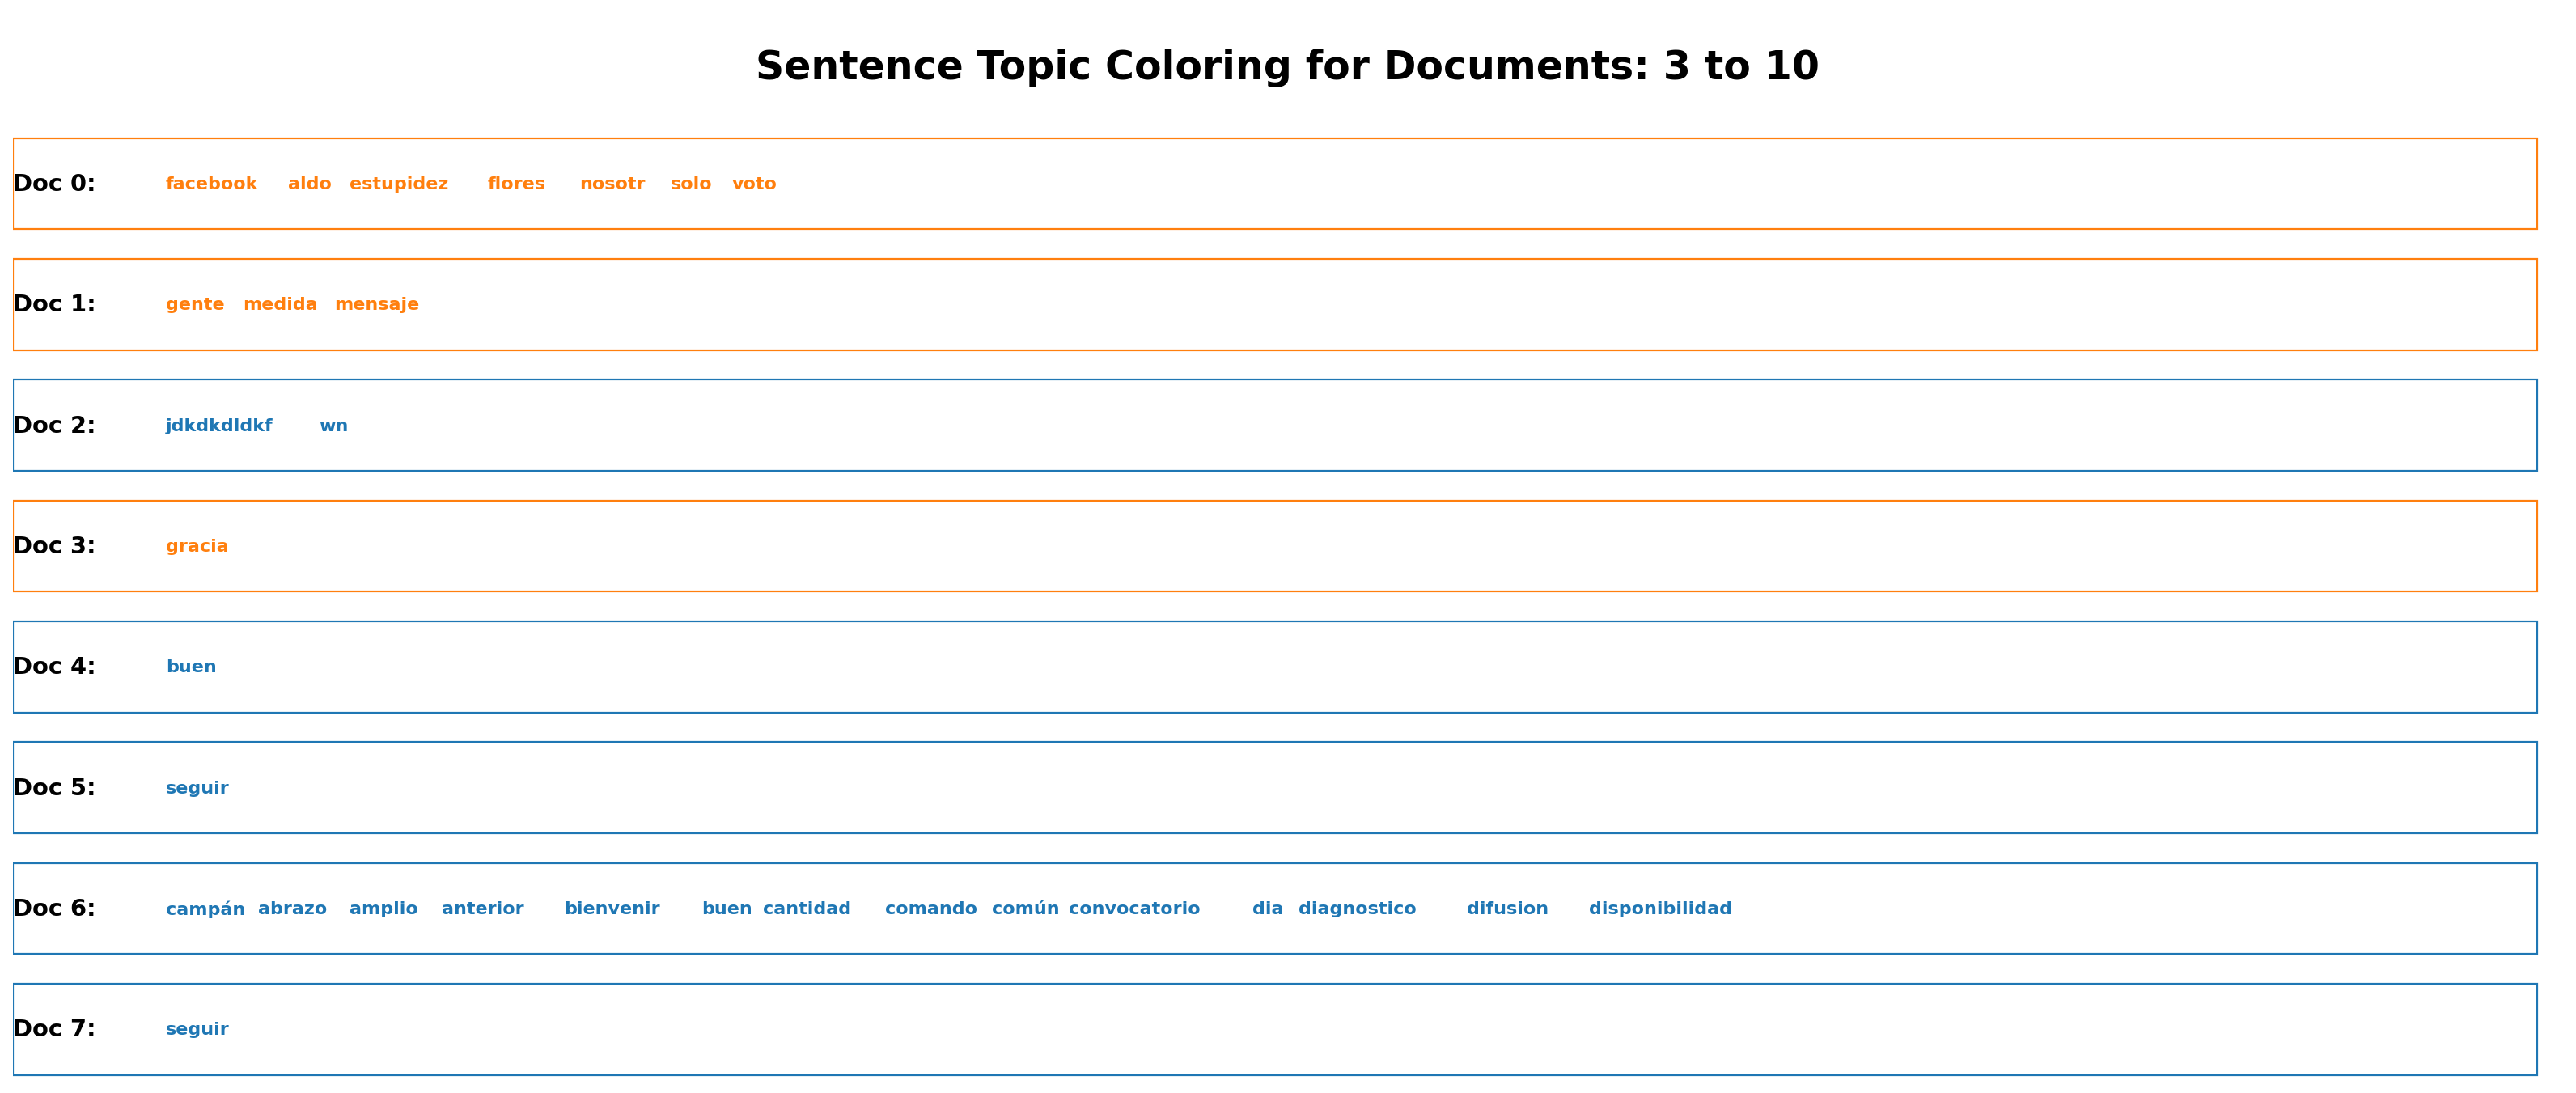

In [62]:
tm.sentences_chart(id2word=id2word, corpus=corpus[10:], num_topics= len(lda_model.show_topics()), start= 3, end = 12)

## TSNE topic clustering

Interactive plot (bokeh)

In [46]:
tm.tsne_plot(model_=lda_model,corp=corpus,name_model='LDA',text=cleaned_doc_train,interactive_labels = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4696 samples in 0.003s...
[t-SNE] Computed neighbors for 4696 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4696
[t-SNE] Computed conditional probabilities for sample 2000 / 4696
[t-SNE] Computed conditional probabilities for sample 3000 / 4696
[t-SNE] Computed conditional probabilities for sample 4000 / 4696
[t-SNE] Computed conditional probabilities for sample 4696 / 4696
[t-SNE] Mean sigma: 0.001386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.890076
[t-SNE] KL divergence after 1000 iterations: 0.290334


Simple plot

In [47]:
tm.tsne_plot(model_=lda_model,corp=corpus,name_model='LDA',text=cleaned_doc_train,interactive_labels = False)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4696 samples in 0.002s...
[t-SNE] Computed neighbors for 4696 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4696
[t-SNE] Computed conditional probabilities for sample 2000 / 4696
[t-SNE] Computed conditional probabilities for sample 3000 / 4696
[t-SNE] Computed conditional probabilities for sample 4000 / 4696
[t-SNE] Computed conditional probabilities for sample 4696 / 4696
[t-SNE] Mean sigma: 0.001362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.903790
[t-SNE] KL divergence after 1000 iterations: 0.278806


# Comparing LSA / LSI

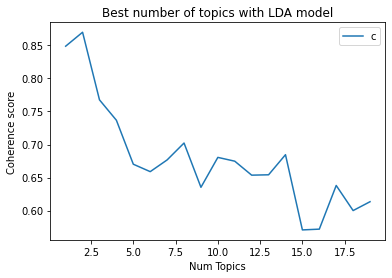

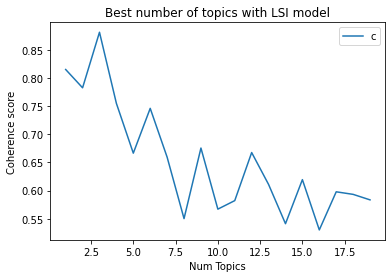

In [55]:
GRP = []; cs = []; ml =[]; top = []

groups = [name]

for i in range(len(groups)):
  GRP.append(groups[i])
  ml.append('LDA')
  model_list, coherence_values = tm.compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word,texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LDA')
  cs.append(max(coherence_values))
  lda_model = model_list[coherence_values.index(max(coherence_values))]
  top.append(len(lda_model.show_topics()))
  GRP.append(groups[i])
  ml.append('LSI')
  model_list, coherence_values = tm.compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=cleaned_doc_train, start=1, limit=20, step=1, model_='LSI')
  cs.append(max(coherence_values))
  lsi_model = model_list[coherence_values.index(max(coherence_values))]
  top.append(len(lsi_model.show_topics()))

In [57]:
results = pd.DataFrame(data={'Group_name':GRP, 'Coherence Score':cs, 'Model':ml, '# topics':top})
results.sort_values('Coherence Score',ascending=False)

,Group_name,Coherence Score,Model,# topics
1,Conchalí con Boric🌳,0.880909,LSI,3
0,Conchalí con Boric🌳,0.869889,LDA,2
